# Linear Regression

In [1]:
# Import modules
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")


In [3]:
# Read dataset
df = pd.read_excel('data/soil_physical_properties_ks_mesonet.xlsx', sheet_name='dataset')

# Drop rows with missing data in any column
df = df.dropna(axis=0, how='any')

# Display a few rows
df.head(20)

,station_name,county,latitude,longitude,nominal_depth,organic_matter,sand,silt,clay,textural_class,bulk_density,particle_density,porosity,field_capacity,wilting_point
0,Manhattan,Riley,39.20856,-96.59169,5,3.3,11,60,29,silty clay loam,1.31,2.79,53.1,39.5,16.8
1,Manhattan,Riley,39.20856,-96.59169,10,2.8,9,58,33,silty clay loam,1.36,2.61,47.9,36.8,18.1
2,Manhattan,Riley,39.20856,-96.59169,20,2.9,9,58,33,silty clay loam,1.39,2.59,46.4,36.9,18.2
3,Manhattan,Riley,39.20856,-96.59169,50,2.3,6,56,39,silty clay loam,1.47,2.63,44.2,41.0,23.7
4,Ashland Bottoms,Riley,39.12584,-96.63643,5,3.2,9,58,33,silty clay loam,1.29,2.54,49.4,37.7,14.9
5,Ashland Bottoms,Riley,39.12584,-96.63643,10,2.7,5,58,37,silty clay loam,1.34,2.53,46.9,37.2,17.3
6,Ashland Bottoms,Riley,39.12584,-96.63643,20,2.6,3,47,51,silty clay,1.29,2.54,49.3,39.8,22.5
7,Ashland Bottoms,Riley,39.12584,-96.63643,50,2.2,3,53,44,silty clay,1.35,2.68,49.7,38.3,21.1
8,Clay Center,Clay,39.41722,-97.13926,5,4.8,12,45,43,silty clay,1.34,2.52,46.8,40.5,10.7
9,Clay Center,Clay,39.41722,-97.13926,10,3.2,9,65,25,silt loam,1.42,2.62,45.8,40.4,12.2


In [4]:
# Show size of dataset
df.shape

(157, 15)

### Examine relationship between variables

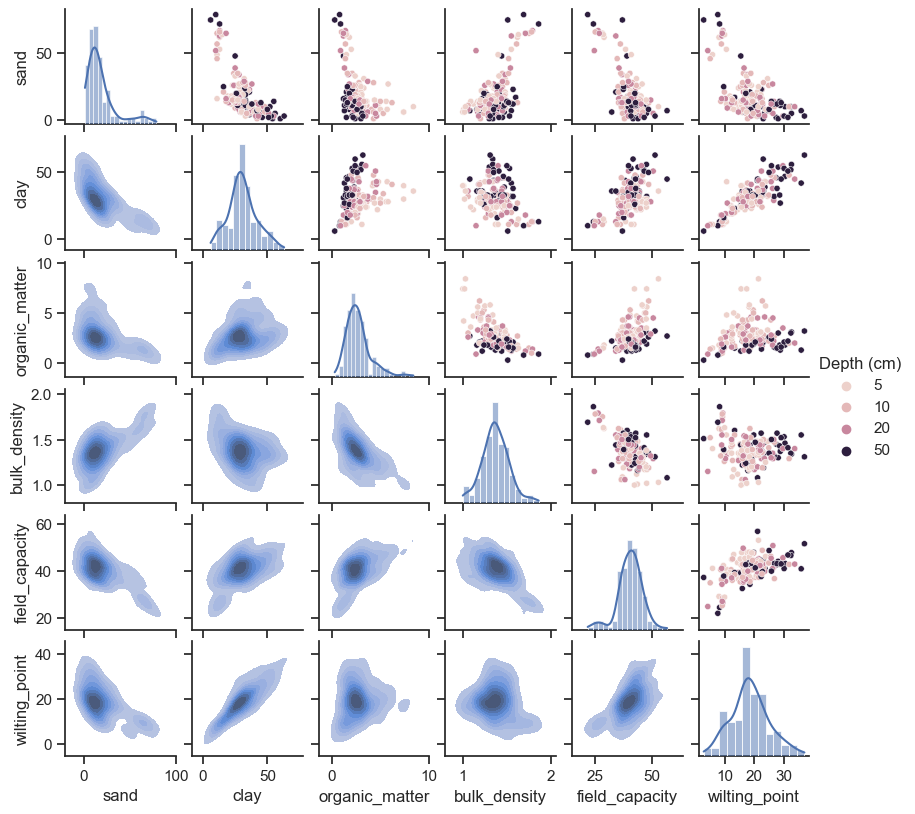

In [5]:
cols = ['sand','clay','organic_matter','bulk_density','field_capacity','wilting_point']

f = sns.PairGrid(df, vars=cols)
f.figure.set_size_inches(8,8)
f.map_upper(sns.scatterplot, s=20, hue=df['nominal_depth'])
f.map_diag(sns.histplot, kde=True)
f.map_lower(sns.kdeplot, fill=True)
f.add_legend(title='Depth (cm)')
plt.show()


In [6]:
# Compute the Pearson correlation coefficient (r) for each combination of variables
df[cols].corr()

,sand,clay,organic_matter,bulk_density,field_capacity,wilting_point
sand,1.000000,-0.678564,-0.437483,0.581250,-0.634916,-0.576771
clay,-0.678564,1.000000,0.280827,-0.310611,0.524335,0.825752
organic_matter,-0.437483,0.280827,1.000000,-0.619807,0.496803,0.111084
bulk_density,0.581250,-0.310611,-0.619807,1.000000,-0.534188,-0.123107
field_capacity,-0.634916,0.524335,0.496803,-0.534188,1.000000,0.549126
wilting_point,-0.576771,0.825752,0.111084,-0.123107,0.549126,1.000000


In [7]:
# Fit linear model and get optimized slope and intercept
x_obs = df['clay'].values
y_obs = df['wilting_point'].values
slope, intercept, rvalue, pvalue, sterr = linregress(x_obs, y_obs)
r_squared = rvalue**2
print(f"R-squared: {r_squared:.3f}")


R-squared: 0.682


In [11]:
# Use optimized model to create line 
x_line = np.linspace(0, 60) # range of clay content
y_line = intercept + slope * x_line


In [16]:
# Compute root mean squared error (RMSE)
y_pred = intercept + slope * x_obs
RMSE = np.sqrt(np.nanmean((y_pred - y_obs)**2))
print(round(RMSE,3), "% by volume")


3.665 % by volume


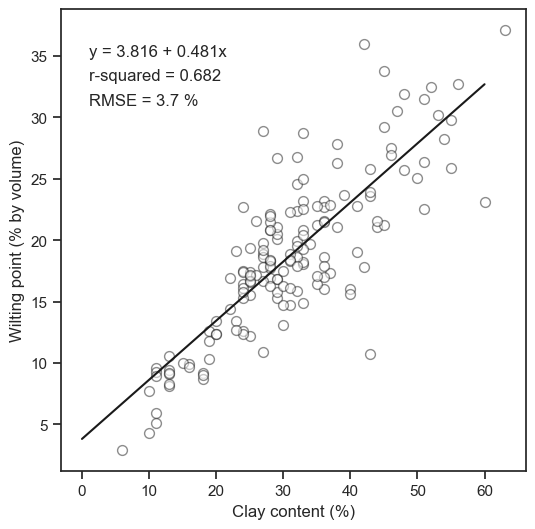

In [15]:
# Create figure with regression line
plt.figure(figsize=(6,6))
plt.scatter(x_obs, y_obs, s=50, facecolor='w', alpha=0.5, edgecolor='k')
plt.plot(x_line, y_line, '-k')
plt.xlabel("Clay content (%)")
plt.ylabel("Wilting point (% by volume)")
plt.text(1, 35, f"y = {intercept:.3f} + {slope:.3f}x")
plt.text(1, 33, f"r-squared = {r_squared:.3f}",)
plt.text(1, 31, f"RMSE = {RMSE:.1f} %")
plt.show()